In [15]:
import numpy as np
import torch
import os
from neural_verification import *
import matplotlib.pyplot as plt
import itertools
import copy

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

D = 2
thres = 0.1
error_tol = 0.1

def check_integer_arr(arr):
    non_integer = np.abs(arr - np.round(arr)) > thres
    all_integer = np.sum(non_integer) < error_tol * arr.shape[0]
    #print(np.sum(non_integer), arr.shape[0])
    return all_integer

'''def get_vol_p(x):
    assert data_points.shape[0] == D+1 and data_points.shape[1] == D
    dx = copy.deepcopy(x)
    dx = dx[:,[0]]
    area = np.abs(np.linalg.det(np.array(dx[:,1:])))
    return vol'''

def get_vol_arr(x):
    num = x.shape[0]
    areas = []
    groups = list(itertools.combinations(x, D))
    vols = np.abs(np.linalg.det(np.array(groups)))
    return np.array(vols)

def set_arr(arr):
    arr = np.sort(arr)
    length = arr.shape[0]
    sets = []
    for i in range(length):
        set_num = len(sets)
        if set_num == 0:
            sets.append(arr[i])
        else:
            if np.abs(arr[i] - sets[-1]) > thres:
                sets.append(arr[i])
    return np.array(sets)

def normalize(arr):
    arr = np.sort(arr.reshape(-1,))
    arr = arr[np.where(arr > thres)]
    arr = set_arr(arr)
    return arr

def GCD_2num_v(a, b, va, vb):
    while True:
        temp = a
        a = b
        b = temp

        temp = va
        va = vb
        vb = temp
        
        proj = np.round(a/b)
        a = a - proj * b
        va = va - proj * vb
        if np.abs(a) < thres:
            break
    return np.abs(b), vb

def GCD_arr(arr):
    while True:
        va = arr[[0]]; vb = arr[[1]]; v3 = arr[2:D+1]
        a = np.linalg.det(np.concatenate([va, v3], axis=0))
        b = np.linalg.det(np.concatenate([vb, v3], axis=0))
        
        if b == 0 or a == 0:
            if b == 0:
                arr = np.delete(arr, 1, 0)
            if a == 0:
                arr = np.delete(arr, 0, 0)
            continue
        gcd, vbp = GCD_2num_v(a, b, va, vb)
        flag = check_integer_arr(vol_arr/gcd)
        if flag == True:
            break
        else:
            arr = arr[1:]
            arr[0] = vbp
    return np.concatenate([vbp, v3], axis=0)

def normalize_basis(basis):
    basis = copy.deepcopy(basis)
    ii = 0
    while True and ii < 5:
        projs = []
        for i in range(D):
            proj = np.round(np.sum(basis*basis[[i]],axis=1)/np.linalg.norm(basis[i])**2)
            proj[i] = 0
            basis -= proj[:,np.newaxis] * basis[[i]]
            projs.append(proj)
        projs = np.array(projs)
        if np.sum(np.abs(projs)) == 0:
            break
        ii += 1
    basis *= (-1)**(np.sum(basis, axis=1)<0)[:,np.newaxis]
    return basis

def GCD_arr_1D(arr):
    while True:
        a = arr[0]
        b = arr[1]
        gcd = GCD_2num(a, b)
        arr_div_gcd = arr/gcd
        flag = check_integer_arr(arr_div_gcd)
        if flag == True:
            break
        else:
            arr = np.delete(arr, 0)
            arr = np.delete(arr, 0)
            np.insert(arr,0,gcd)
    return gcd

def GCD_arr(arr):
    while True:
        va = arr[[0]]; vb = arr[[1]]; v3 = arr[2:D+1]
        a = np.linalg.det(np.concatenate([va, v3], axis=0))
        b = np.linalg.det(np.concatenate([vb, v3], axis=0))
        
        if b == 0 or a == 0:
            if b == 0:
                arr = np.delete(arr, 1, 0)
            if a == 0:
                arr = np.delete(arr, 0, 0)
            continue
        gcd, vbp = GCD_2num_v(a, b, va, vb)
        flag = check_integer_arr(vol_arr/gcd)
        if flag == True:
            break
        else:
            arr = arr[1:]
            arr[0] = vbp
    return np.concatenate([vbp, v3], axis=0)


def GCD_2num(a, b):
    while True:
        if np.abs(a) < np.abs(b):
            temp = a
            a = b
            b = temp
        a = a - np.floor(a/b) * b
        if np.abs(a) < thres:
            break
    return np.abs(b)

arr = [[0.0, 0.0], [6.9964, 0.0064952], [5.24796824136, 16.068301091439995], [1.746496957220275, 28.115834943616537], [12.240807006324614, 32.13839586269249], [0.0, 60.21363729714298], [0.0, 60.20044460595384], [0.0, 60.18887967257206], [15.754105126660356, 60.20979420867029], [0.0, 96.34134284147919], [0.0, 96.33679743862675], [0.0, 96.31439159939517], [14.007019580143535, 96.33745888191535], [0.0, 128.47940866305805], [0.0, 128.46035044045914], [6.997425313091959, 128.48026913532698], [6.991220137302619, 144.55947046535064], [0.0, 160.559532141197], [0.0, 160.51461188155466], [0.0, 160.5297856979902], [1.7702723713856727, 160.54820256228084], [1.7419609084142706, 164.62941954870806], [0.0, 168.64283904283664], [0.0, 168.6588219911238], [0.0, 168.67480014452647], [0.0, 168.69077350448313], [0.0, 168.7067420724318], [0.0, 168.7227058498101], [0.0, 168.73866483805517], [0.0, 168.75461903860378], [0.0, 168.7705684528922], [0.0, 168.78651308235635], [0.0, 168.80245292843165]]

In [16]:
arr = np.array(arr)
#arr = arr[np.where(arr[:,0] + arr[:,1] < 83)[0]]

In [17]:
x = arr
vol_arr = normalize(get_vol_arr(x))
GCD_arr_1D(vol_arr[:])

0.2514950270378904

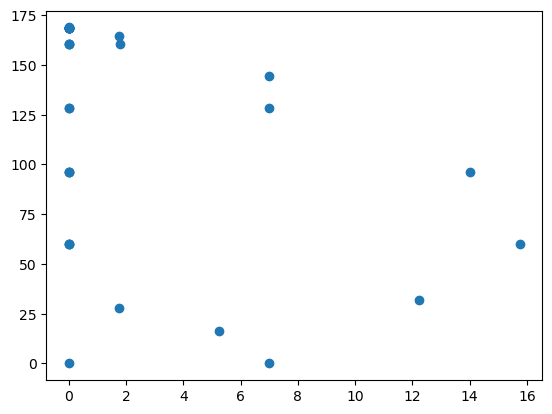

In [18]:
plt.scatter(arr[:,0], arr[:,1])

In [11]:
import copy

basis_comp = GCD_arr(copy.deepcopy(x))
basis_comp
basis_comp = normalize_basis(basis_comp)
basis_comp

143 175
139 175
144 175
141 175
140 175
139 175
138 175
143 175
142 175
142 175
143 175
140 175
152 175


LinAlgError: Last 2 dimensions of the array must be square